### 最後一步了！
做 ratio map

湯底是 mvp_smoothFurst/4_ratio/py_smoothFirst_all-ratio_v1.ipynb  
這邊處理的數據理論上來說解析度是統一的 (by imsmooth)...所以不會再做卷積   

有兩種**固定的**beam 和網格搭配：
1. beam4545 && pixelStep = 1.5 arcsec (Wilson 2023)
2. beam4545 && pixelStep = 1.13 arcsec (aqing) # 好啦，這個 pixelStep 有一點改動空間
##
不會用 replace 的瓠瓜已經改變數名改到快死掉了xp


In [1]:
# modular

import matplotlib.pyplot as plt
import numpy as np
from astropy.io import fits
from astropy.wcs import WCS
from astropy import units as u 
from reproject import reproject_interp

In [2]:
# hand made function

# 存檔芝士
def Save_as_FITS(the_file_name, ima_data, ref_header, ref_beam, beam_a_Beam): 
    the_file_name = the_file_name + '.fits'
    the_header = ref_header.copy() # new header 是複製一個已知 header 的大部分...
    if beam_a_Beam == True: # ref_beam 是實際意義上的 Beam 的話
        the_header['BMAJ'] = ref_beam.major.to(u.deg).value
        the_header['BMIN'] = ref_beam.minor.to(u.deg).value
        the_header['BPA'] = ref_beam.pa.to(u.deg).value
    else: # ref_beam 是一個 header 的話
        the_header['BMAJ'] = ref_beam['BMAJ']
        the_header['BMIN'] = ref_beam['BMIN']
        the_header['BPA'] = ref_beam['BPA']
    fits.writeto(the_file_name, ima_data, the_header, overwrite=True)
    print(f'Successfully saved a new FITS file as {the_file_name}')


# 新網格機！
'''
input a hdul&&像素步長 in arcsec
return new_shape, new_wcs, 和定義的 header 本人 
'''
def reGrid(reGrid_obj, pixelStep_target): 
    reGrid_obj_header = reGrid_obj[0].header
    ori_n1, ori_n2 = reGrid_obj[0].data.squeeze().shape # (y, x)
    new_n2 = int(ori_n2*abs(reGrid_obj_header['CDELT1']) / (pixelStep_target/3600)) # 要純量相除！
    new_n1 = int(ori_n1*abs(reGrid_obj_header['CDELT2']) / (pixelStep_target/3600))
    new_header = fits.Header()
    new_header['NAXIS'] = 2
    new_header['NAXIS1'] = new_n2
    new_header['NAXIS2'] = new_n1
    new_header['CRPIX1'] = new_n2 * 0.5 + 1
    new_header['CRPIX2'] = new_n1 * 0.5 + 1
    new_header['CRVAL1'] = 213.2915 # 暴力抓蟲
    new_header['CRVAL2'] = -65.339 # 暴力抓蟲
    new_header['CDELT1'] = pixelStep_target / -3600
    new_header['CDELT2'] = pixelStep_target / 3600
    new_header['CTYPE1'] = 'RA---SIN'
    new_header['CTYPE2'] = 'DEC--SIN'
    new_header['CUNIT1'] = 'deg'
    new_header['CUNIT2'] = 'deg'
    new_header['BMAJ'] = reGrid_obj_header['BMAJ']
    new_header['BMIN'] = reGrid_obj_header['BMIN']
    new_header['BPA'] = reGrid_obj_header['BPA']
    print('Giving reprojecting material...')
    return (new_n2, new_n1), WCS(new_header), new_header


In [4]:
# import data
commomPath = '/Users/aqing/Documents/1004/Circinus_galaxy/Ratio-Map/oldData/v2/2_mom0/'

#beam3030
CO_b30_hdul = fits.open(f"{commomPath}CO-1-0_oldData_mom0_smoothed-3030.fits")
HCN_b30_hdul = fits.open(f"{commomPath}HCN-1-0_oldData_mom0_smoothed-3030.fits")
CN_J12_b30_hdul = fits.open(f"{commomPath}CN-J12-12_oldData_mom0_smoothed-3030.fits")
CN_J32_b30_hdul = fits.open(f"{commomPath}CN-J32-12_oldData_mom0_smoothed-3030.fits")
CO_b30_header, HCN_b30_header, CN_J12_b30_header, CN_J32_b30_header = CO_b30_hdul[0].header, HCN_b30_hdul[0].header, CN_J12_b30_hdul[0].header, CN_J32_b30_hdul[0].header
CO_b30_ima, HCN_b30_ima, CN_J12_b30_ima, CN_J32_b30_ima = CO_b30_hdul[0].data.squeeze(), HCN_b30_hdul[0].data.squeeze(), CN_J12_b30_hdul[0].data.squeeze(), CN_J32_b30_hdul[0].data.squeeze()
CO_b30_wcs, HCN_b30_wcs, CN_J12_b30_wcs, CN_J32_b30_wcs = WCS(CO_b30_header, naxis=2), WCS(HCN_b30_header, naxis=2), WCS(CN_J12_b30_header, naxis=2), WCS(CN_J32_b30_header, naxis=2)

#beam4545
CO_b45_hdul = fits.open(f"{commomPath}CO-1-0_oldData_mom0_smoothed-4545.fits")
HCN_b45_hdul = fits.open(f"{commomPath}HCN-1-0_oldData_mom0_smoothed-4545.fits")
CN_J12_b45_hdul = fits.open(f"{commomPath}CN-J12-12_oldData_mom0_smoothed-4545.fits")
CN_J32_b45_hdul = fits.open(f"{commomPath}CN-J32-12_oldData_mom0_smoothed-4545.fits")
CO_b45_header, HCN_b45_header, CN_J12_b45_header, CN_J32_b45_header = CO_b45_hdul[0].header, HCN_b45_hdul[0].header, CN_J12_b45_hdul[0].header, CN_J32_b45_hdul[0].header
CO_b45_ima, HCN_b45_ima, CN_J12_b45_ima, CN_J32_b45_ima = CO_b45_hdul[0].data.squeeze(), HCN_b45_hdul[0].data.squeeze(), CN_J12_b45_hdul[0].data.squeeze(), CN_J32_b45_hdul[0].data.squeeze()
CO_b45_wcs, HCN_b45_wcs, CN_J12_b45_wcs, CN_J32_b45_wcs = WCS(CO_b45_header, naxis=2), WCS(HCN_b45_header, naxis=2), WCS(CN_J12_b45_header, naxis=2), WCS(CN_J32_b45_header, naxis=2)


Set OBSGEO-B to   -23.022886 from OBSGEO-[XYZ].
Set OBSGEO-H to     5053.796 from OBSGEO-[XYZ]'. [astropy.wcs.wcs]


In [5]:
# regridding

# Wilson
pixelStep_W = 1.5 # arcsec
CO_b30_Nshape, CO_b30_Nwcs, CO_b30_Nheader = reGrid(CO_b30_hdul, pixelStep_W) # 因為網格機是基於 CO 寫的，所以以 CO 為準
CO_b30_ima_reproj, _ = reproject_interp((CO_b30_ima, CO_b30_wcs), CO_b30_Nwcs, shape_out=CO_b30_Nshape)

HCN_b30_ima_reproj, _ = reproject_interp((HCN_b30_ima, HCN_b30_wcs), CO_b30_Nwcs, shape_out=CO_b30_Nshape) # 寄生
HCN_b30_Nheader = CO_b30_Nheader.copy()
CN_J12_b30_ima_reproj, _ = reproject_interp((CN_J12_b30_ima, CN_J12_b30_wcs), CO_b30_Nwcs, shape_out=CO_b30_Nshape) # 寄生
CN_J12_b30_Nheader = CO_b30_Nheader.copy()
CN_J32_b30_ima_reproj, _ = reproject_interp((CN_J32_b30_ima, CN_J32_b30_wcs), CO_b30_Nwcs, shape_out=CO_b30_Nshape) # 寄生
CN_J32_b30_Nheader = CO_b30_Nheader.copy()

# meeeee
pixelStep_m = 1.13 # arcsec
CO_b45_Nshape, CO_b45_Nwcs, CO_b45_Nheader = reGrid(CO_b45_hdul, pixelStep_m) # 因為網格機是基於 CO 寫的，所以以 CO 為準
CO_b45_ima_reproj, _ = reproject_interp((CO_b45_ima, CO_b45_wcs), CO_b45_Nwcs, shape_out=CO_b45_Nshape)
HCN_b45_ima_reproj, _ = reproject_interp((HCN_b45_ima, HCN_b45_wcs), CO_b45_Nwcs, shape_out=CO_b45_Nshape) # 寄生
HCN_b45_Nheader = CO_b45_Nheader.copy()
CN_J12_b45_ima_reproj, _ = reproject_interp((CN_J12_b45_ima, CN_J12_b45_wcs), CO_b45_Nwcs, shape_out=CO_b45_Nshape) # 寄生
CN_J12_b45_Nheader = CO_b45_Nheader.copy()
CN_J32_b45_ima_reproj, _ = reproject_interp((CN_J32_b45_ima, CN_J32_b45_wcs), CO_b45_Nwcs, shape_out=CO_b45_Nshape) # 寄生
CN_J32_b45_Nheader = CO_b45_Nheader.copy()
# 雞掰 replace 到底怎麼用

beamKey = ['BMAJ', 'BMIN', 'BPA']
for i in beamKey :
    HCN_b30_Nheader[i] = HCN_b30_header[i]
    CN_J12_b30_Nheader[i] = CN_J12_b30_header[i]
    CN_J32_b30_Nheader[i] = CN_J32_b30_header[i]
    HCN_b45_Nheader[i] = HCN_b45_header[i]
    CN_J12_b45_Nheader[i] = CN_J12_b45_header[i]
    CN_J32_b45_Nheader[i] = CN_J32_b45_header[i]

Giving reprojecting material...
Giving reprojecting material...


In [ ]:
'''
# show the regrid ima

print(f'pixel step : {pixelStep}')
fig_rg, ax = plt.subplots(2, 3, figsize=(12, 6), subplot_kw={'projection': CO_new_wcs}) # 是這樣設座標的
CO = ax[0, 0].imshow(CO_ima_reproj, cmap='jet', vmin=0) # 要指定物件
fig_rg.colorbar(CO, ax=ax[0, 0]) # call the obj
ax[0, 0].set_title("CO(1-0) mom0_reproj")
ax[0, 0].set_xlabel(' ')
ax[0, 0].set_ylabel('DEC')

HCN = ax[0, 1].imshow(HCN_ima_reproj, cmap='jet', vmin=0)
fig_rg.colorbar(HCN, ax=ax[0, 1]) 
ax[0, 1].set_title("HCN(1-0) mom0_reproj")
ax[0, 1].set_xlabel(' ')
ax[0, 1].set_ylabel(' ')

HCO = ax[0, 2].imshow(HCO_ima_reproj, cmap='jet', vmin=0)
fig_rg.colorbar(HCO, ax=ax[0, 2]) 
ax[0, 2].set_title("HCO+(1-0) mom0_reproj")
ax[0, 2].set_xlabel('RA')
ax[0, 2].set_ylabel(' ')

CN = ax[1, 0].imshow(CN_ima_reproj, cmap='jet', vmin=0)
fig_rg.colorbar(CN, ax=ax[1, 0]) 
ax[1, 0].set_title("CN(J=1/2-1/2) mom0_reproj")
ax[1, 0].set_xlabel('RA')
ax[1, 0].set_ylabel('DEC')

HNC = ax[1, 1].imshow(HNC_ima_reproj, cmap='jet', vmin=0)
fig_rg.colorbar(HNC, ax=ax[1, 1]) 
ax[1, 1].set_title("HNC(1-0) mom0_reproj")
ax[1, 1].set_xlabel('RA')
ax[1, 1].set_ylabel(' ')

CS2 = ax[1, 2].imshow(CS2_ima_reproj, cmap='jet', vmin=0)
fig_rg.colorbar(CS2, ax=ax[1, 2]) 
ax[1, 2].set_title("CS(2-1) mom0_reproj")
ax[1, 2].set_xlabel('RA')
ax[1, 2].set_ylabel(' ')

plt.tight_layout() # 神奇妙妙工具
plt.show()
'''

In [ ]:
# ratio mapS

# beam33
# HCN/CO
with np.errstate(divide='ignore', invalid='ignore') : 
    ratioMap_b30_HCNCO = np.where(CO_b30_ima_reproj>2*10**(-3), HCN_b30_ima_reproj/CO_b30_ima_reproj, np.nan)
    #ratioMap = np.where(CO_ima_reproj!=0, HCN_ima_reproj/CO_ima_reproj, np.nan)
    ratioMap_b30_HCNCO = np.where(ratioMap_b30_HCNCO>2.3, np.nan, ratioMap_b30_HCNCO) # 撇掉一些浮沫
    ratioMap_b30_HCNCO = np.where(ratioMap_b30_HCNCO<-4, np.nan, ratioMap_b30_HCNCO)

# CN(J12-12)/CO
with np.errstate(divide='ignore', invalid='ignore') : 
    ratioMap_b30_CNJ12CO = np.where(CO_b30_ima_reproj>2*10**(-3), CN_J12_b30_ima_reproj/CO_b30_ima_reproj, np.nan)
    ratioMap_b30_CNJ12CO = np.where(ratioMap_b30_CNJ12CO>2.3, np.nan, ratioMap_b30_CNJ12CO)
    ratioMap_b30_CNJ12CO = np.where(ratioMap_b30_CNJ12CO<-4, np.nan, ratioMap_b30_CNJ12CO)

# CN(J32-12)/CO
with np.errstate(divide='ignore', invalid='ignore') : 
    ratioMap_b30_CNJ32CO = np.where(CO_b30_ima_reproj>2*10**(-3), CN_J32_b30_ima_reproj/CO_b30_ima_reproj, np.nan)
    ratioMap_b30_CNJ32CO = np.where(ratioMap_b30_CNJ32CO>2.3, np.nan, ratioMap_b30_CNJ32CO)
    ratioMap_b30_CNJ32CO = np.where(ratioMap_b30_CNJ32CO<-4, np.nan, ratioMap_b30_CNJ32CO)

# beam45
# HCN/CO
with np.errstate(divide='ignore', invalid='ignore') : 
    ratioMap_b45_HCNCO = np.where(CO_b45_ima_reproj>2*10**(-3), HCN_b45_ima_reproj/CO_b45_ima_reproj, np.nan)
    ratioMap_b45_HCNCO = np.where(ratioMap_b45_HCNCO>2.3, np.nan, ratioMap_b45_HCNCO) # 撇掉一些浮沫
    ratioMap_b45_HCNCO = np.where(ratioMap_b45_HCNCO<-4, np.nan, ratioMap_b45_HCNCO)

# CN(J12-12)/CO
with np.errstate(divide='ignore', invalid='ignore') : 
    ratioMap_b45_CNJ12CO = np.where(CO_b45_ima_reproj>2*10**(-3), CN_J12_b45_ima_reproj/CO_b45_ima_reproj, np.nan)
    ratioMap_b45_CNJ12CO = np.where(ratioMap_b45_CNJ12CO>2.3, np.nan, ratioMap_b45_CNJ12CO)
    ratioMap_b45_CNJ12CO = np.where(ratioMap_b45_CNJ12CO<-4, np.nan, ratioMap_b45_CNJ12CO)

# CN(J32-12)/CO
with np.errstate(divide='ignore', invalid='ignore') : 
    ratioMap_b45_CNJ32CO = np.where(CO_b45_ima_reproj>2*10**(-3), CN_J32_b45_ima_reproj/CO_b45_ima_reproj, np.nan)
    ratioMap_b45_CNJ32CO = np.where(ratioMap_b45_CNJ32CO>2.3, np.nan, ratioMap_b45_CNJ32CO)
    ratioMap_b45_CNJ32CO = np.where(ratioMap_b45_CNJ32CO<-4, np.nan, ratioMap_b45_CNJ32CO)


<Figure size 640x480 with 0 Axes>

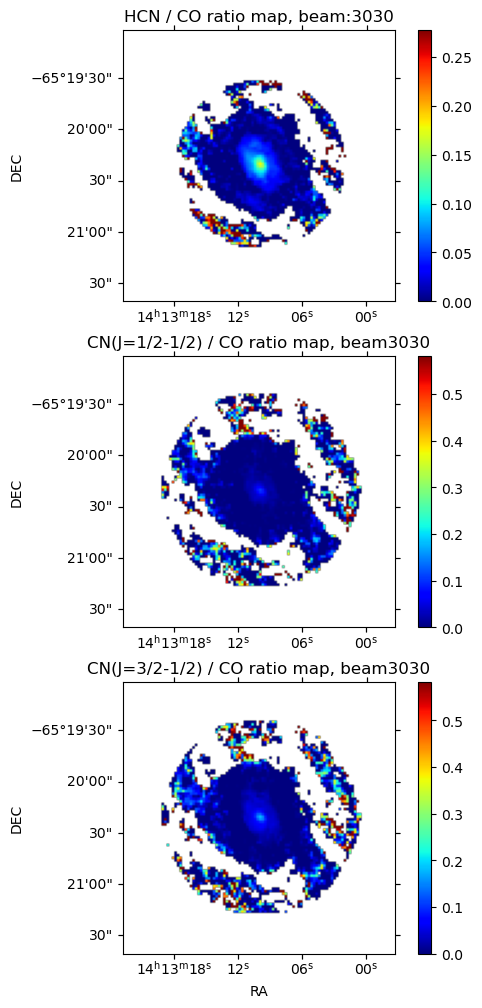

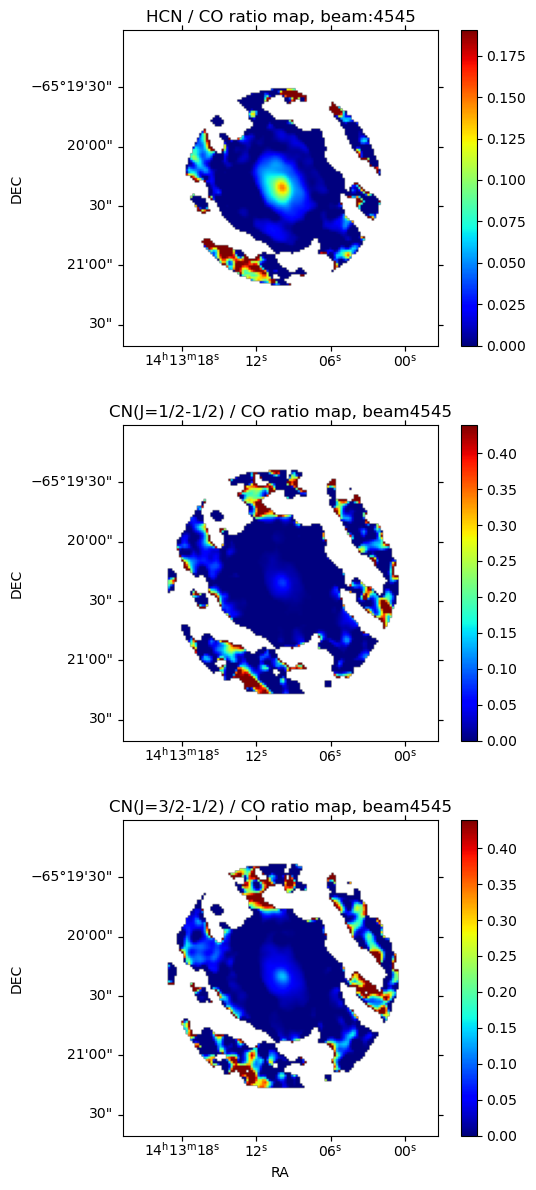

In [10]:
# show ratio maps
# 一坨

# beam3030
plt.figure(0)
fig_ratio_b30, ax = plt.subplots(3, 1, figsize=(6, 12), subplot_kw={'projection': CO_b30_Nwcs})
HCNCO_b30 = ax[0].imshow(ratioMap_b30_HCNCO, origin='lower', cmap='jet', vmin=0, vmax=np.nanpercentile(ratioMap_b30_HCNCO, 95)) # 要指定物件
fig_ratio_b30.colorbar(HCNCO_b30, ax=ax[0]) # call the obj
ax[0].set_title("HCN / CO ratio map, beam:3030")
ax[0].set_xlabel(' ')
ax[0].set_ylabel('DEC')

CNJ12CO_b30 = ax[1].imshow(ratioMap_b30_CNJ12CO, origin='lower', cmap='jet', vmin=0,vmax=np.nanpercentile(ratioMap_b30_CNJ12CO, 95))
fig_ratio_b30.colorbar(CNJ12CO_b30, ax=ax[1]) 
ax[1].set_title("CN(J=1/2-1/2) / CO ratio map, beam3030")
ax[1].set_xlabel(' ')
ax[1].set_ylabel('DEC')

CNJ32CO_b30 = ax[2].imshow(ratioMap_b30_CNJ32CO, origin='lower', cmap='jet', vmin=0,vmax=np.nanpercentile(ratioMap_b30_CNJ12CO, 95))
fig_ratio_b30.colorbar(CNJ32CO_b30, ax=ax[2]) 
ax[2].set_title("CN(J=3/2-1/2) / CO ratio map, beam3030")
ax[2].set_xlabel('RA')
ax[2].set_ylabel('DEC')

# beam4545
plt.figure(1)
fig_ratio_b45, ax = plt.subplots(3, 1, figsize=(6, 12), subplot_kw={'projection': CO_b45_Nwcs})
HCNCO_b45 = ax[0].imshow(ratioMap_b45_HCNCO, origin='lower', cmap='jet', vmin=0, vmax=np.nanpercentile(ratioMap_b45_HCNCO, 95))
fig_ratio_b45.colorbar(HCNCO_b45, ax=ax[0]) # call the obj
ax[0].set_title("HCN / CO ratio map, beam:4545")
ax[0].set_xlabel(' ')
ax[0].set_ylabel('DEC')

CNJ12CO_b45 = ax[1].imshow(ratioMap_b45_CNJ12CO, origin='lower', cmap='jet', vmin=0,vmax=np.nanpercentile(ratioMap_b45_CNJ12CO, 95))
fig_ratio_b45.colorbar(CNJ12CO_b45, ax=ax[1]) 
ax[1].set_title("CN(J=1/2-1/2) / CO ratio map, beam4545")
ax[1].set_xlabel(' ')
ax[1].set_ylabel('DEC')

CNJ32CO_b45 = ax[2].imshow(ratioMap_b45_CNJ32CO, origin='lower', cmap='jet', vmin=0,vmax=np.nanpercentile(ratioMap_b45_CNJ12CO, 95))
fig_ratio_b45.colorbar(CNJ32CO_b45, ax=ax[2]) 
ax[2].set_title("CN(J=3/2-1/2) / CO ratio map, beam4545")
ax[2].set_xlabel('RA')
ax[2].set_ylabel('DEC')


plt.tight_layout() # 神奇妙妙工具
plt.show()

In [ ]:
# save all file

# regrid
Save_as_FITS(f'CO-1-0_oldData_mom0_smoothed-3030_regrid{pixelStep_W}', CO_b30_ima_reproj, CO_b30_Nheader, CO_b30_Nheader, False)
Save_as_FITS(f'HCN-1-0_oldData_mom0_smoothed-3030_regrid{pixelStep_W}', HCN_b30_ima_reproj, HCN_b30_Nheader, HCN_b30_Nheader, False)
Save_as_FITS(f'CN-J12-12_oldData_mom0_smoothed-3030_regrid{pixelStep_W}', CN_J12_b30_ima_reproj, CN_J12_b30_Nheader, CN_J12_b30_Nheader, False)
Save_as_FITS(f'CN-J32-12_oldData_mom0_smoothed-3030_regrid{pixelStep_W}', CN_J32_b30_ima_reproj, CN_J32_b30_Nheader, CN_J32_b30_Nheader, False)

Save_as_FITS(f'CO-1-0_oldData_mom0_smoothed-4545_regrid{pixelStep_m}', CO_b45_ima_reproj, CO_b45_Nheader, CO_b45_Nheader, False)
Save_as_FITS(f'HCN-1-0_oldData_mom0_smoothed-4545_regrid{pixelStep_m}', HCN_b45_ima_reproj, HCN_b45_Nheader, HCN_b45_Nheader, False)
Save_as_FITS(f'CN-J12-12_oldData_mom0_smoothed-4545_regrid{pixelStep_m}', CN_J12_b45_ima_reproj, CN_J12_b45_Nheader, CN_J12_b45_Nheader, False)
Save_as_FITS(f'CN-J32-12_oldData_mom0_smoothed-4545_regrid{pixelStep_m}', CN_J32_b45_ima_reproj, CN_J32_b45_Nheader, CN_J32_b45_Nheader, False)

# ratio
Save_as_FITS(f"HCN-CO_oldData_smoothed-3030_regrid{pixelStep_W}_ratio", ratioMap_b30_HCNCO, CO_b30_Nheader, CO_b30_Nheader, False)
Save_as_FITS(f"CNJ12-CO_oldData_smoothed-3030_regrid{pixelStep_W}_ratio", ratioMap_b30_CNJ12CO, CO_b30_Nheader, CO_b30_Nheader, False)
Save_as_FITS(f"CNJ32-CO_oldData_smoothed-3030_regrid{pixelStep_W}_ratio", ratioMap_b30_CNJ32CO, CO_b30_Nheader, CO_b30_Nheader, False)

Save_as_FITS(f"HCN-CO_oldData_smoothed-4545_regrid{pixelStep_m}_ratio", ratioMap_b45_HCNCO, CO_b45_Nheader, CO_b45_Nheader, False)
Save_as_FITS(f"CNJ12-CO_oldData_smoothed-4545_regrid{pixelStep_m}_ratio", ratioMap_b45_CNJ12CO, CO_b45_Nheader, CO_b45_Nheader, False)
Save_as_FITS(f"CNJ32-CO_oldData_smoothed-4545_regrid{pixelStep_m}_ratio", ratioMap_b45_CNJ32CO, CO_b45_Nheader, CO_b45_Nheader, False)

Successfully saved a new FITS file as CO-1-0_oldData_mom0_smoothed-3030_regrid1.5.fits
Successfully saved a new FITS file as HCN-1-0_oldData_mom0_smoothed-3030_regrid1.5.fits
Successfully saved a new FITS file as CN-J12-12_oldData_mom0_smoothed-3030_regrid1.5.fits
Successfully saved a new FITS file as CN-J32-12_oldData_mom0_smoothed-3030_regrid1.5.fits
Successfully saved a new FITS file as CO-1-0_oldData_mom0_smoothed-4545_regrid1.13.fits
Successfully saved a new FITS file as HCN-1-0_oldData_mom0_smoothed-4545_regrid1.13.fits
Successfully saved a new FITS file as CN-J12-12_oldData_mom0_smoothed-4545_regrid1.13.fits
Successfully saved a new FITS file as CN-J32-12_oldData_mom0_smoothed-4545_regrid1.13.fits
Successfully saved a new FITS file as HCN-CO_oldData_smoothed-3030_regrid1.5_ratio.fits
Successfully saved a new FITS file as CNJ12-CO_oldData_smoothed-3030_regrid1.5_ratio.fits
Successfully saved a new FITS file as CNJ32-CO_oldData_smoothed-3030_regrid1.5_ratio.fits
Successfully saved